<a href="https://colab.research.google.com/github/mashhisyam/PVCK_Genap_2022/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


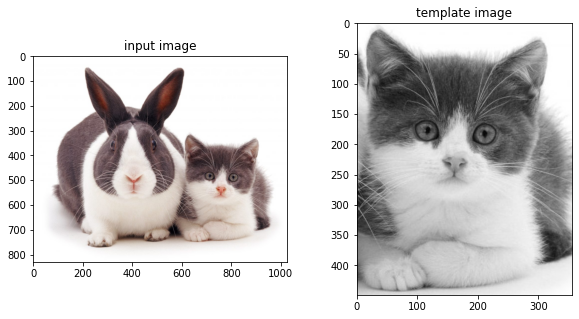

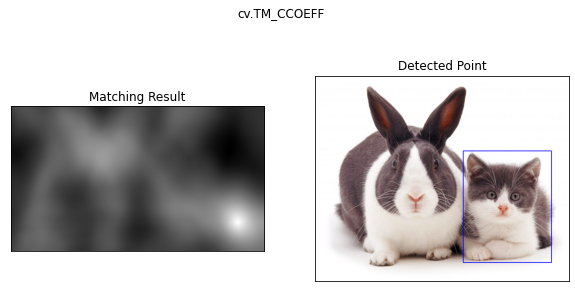

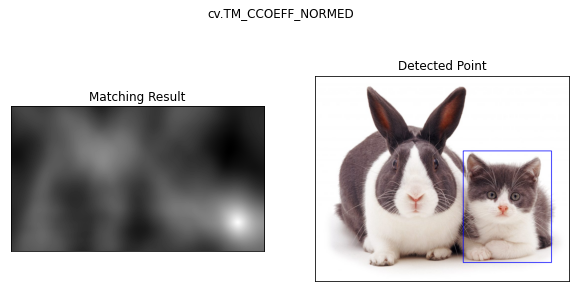

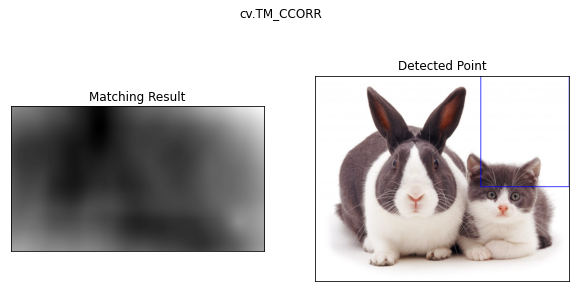

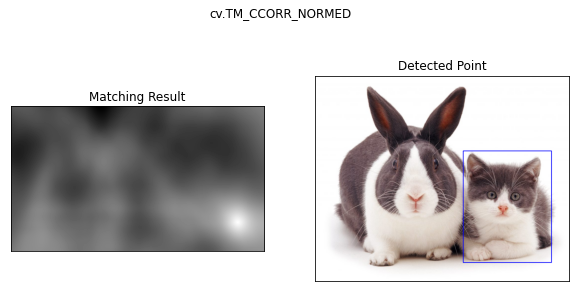

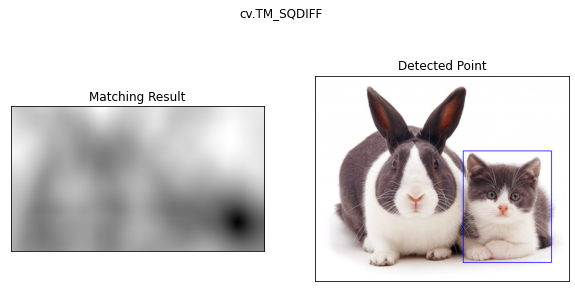

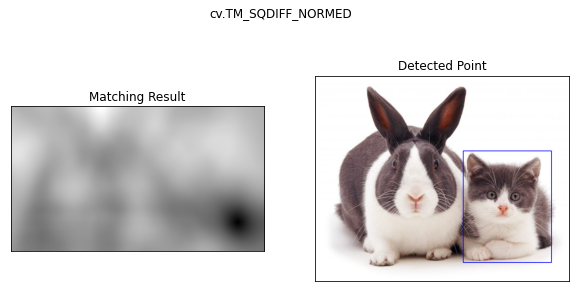

In [ ]:
bunnies_cat = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/cats_and_bunnies.jpg')
bunnies_cat_gray = cv.cvtColor(bunnies_cat, cv.COLOR_BGR2GRAY)
image = bunnies_cat.copy()

cat = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/cat2_templatejpg.jpg',0)
w, h = cat.shape[::-1]
f, axarr = plt.subplots(1,2,figsize=(10,5))
axarr[0].imshow(cv.cvtColor(bunnies_cat, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(cat, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

methods =['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
          'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED'
          ]

for meth in methods:
  img = image.copy()
  method = eval(meth)
  res = cv.matchTemplate(bunnies_cat_gray, cat, method)
  min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
  
  if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
    top_left = min_loc
  else:
    top_left = max_loc
  bottom_right = (top_left[0] + w, top_left[1]+h)

  cv.rectangle(img, top_left, bottom_right, 255, 2)
  plt.figure(figsize=(10,5))
  plt.subplot(121), plt.imshow(res,cmap='gray')
  plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
  plt.suptitle(meth)
  plt.show

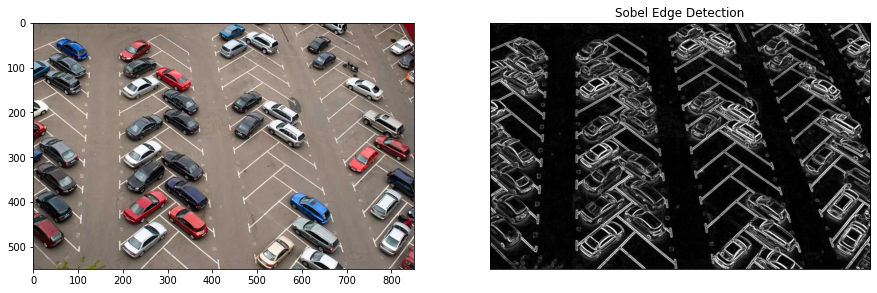

In [10]:
park = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/parking-lot-cars.jpg')
park_gray = cv.cvtColor(park, cv.COLOR_BGR2GRAY)

img = cv.GaussianBlur(park_gray,(3,3),0)

img_xsobel = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3 )
img_ysobel = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

img_xysobel = cv.addWeighted(cv.convertScaleAbs(img_xsobel), 0.5, cv.convertScaleAbs(img_ysobel), 0.5, 0)

f, axarr = plt.subplots(1,2, figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(park, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(park, cv.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(img_xysobel, cmap='gray')
plt.title('Sobel Edge Detection'), plt.xticks([]), plt.yticks([])
plt.show()

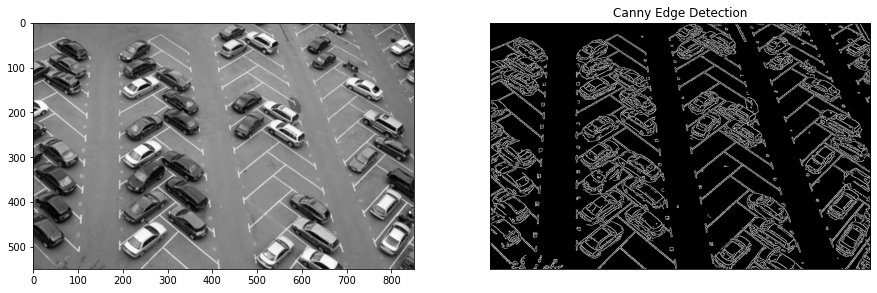

In [13]:
park_copy = park.copy()
edges = cv.Canny(park_copy,100,200)

f,axarr = plt.subplots(1,2, figsize=(15,5))
plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(edges,cmap='gray')
plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])
plt.show()

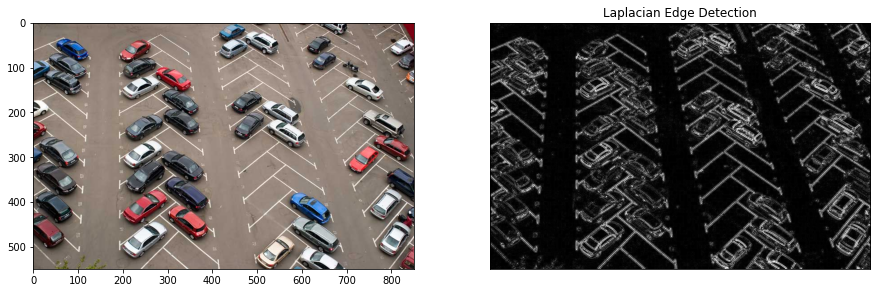

In [14]:
park_blur = cv.GaussianBlur(park_copy,(3,3),0)
park_copy_gray = cv.cvtColor(park_blur,cv.COLOR_BGR2GRAY)
filtered_image = cv.Laplacian(park_copy_gray, ksize = 3, ddepth=cv.CV_16S)

filtered_image = cv.convertScaleAbs(filtered_image)

f,axarr = plt.subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(park_copy, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(park_copy, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(filtered_image, cmap='gray')
plt.title('Laplacian Edge Detection'), plt.xticks([]), plt.yticks([])
plt.show()

Harris Corner Detection


(<matplotlib.image.AxesImage at 0x7fbfa37aad10>,
 Text(0.5, 1.0, 'Laplacian Edge Detection'))

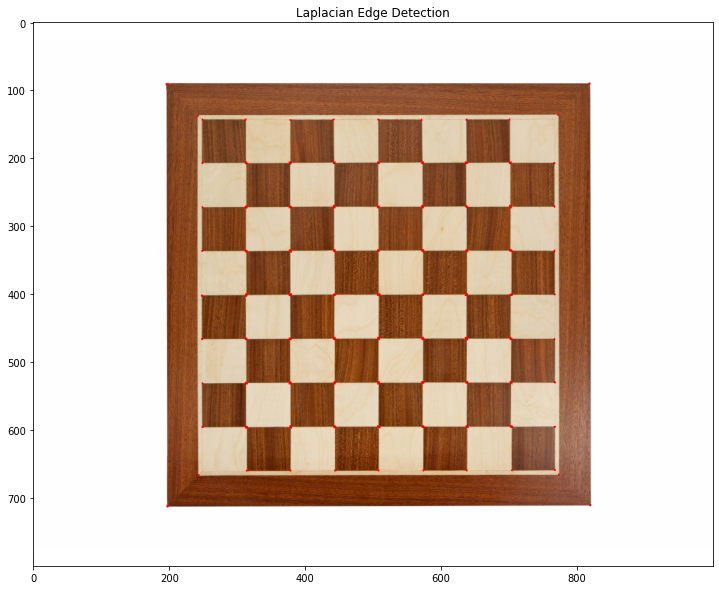

In [18]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/chess-board.jpg')
gray_img = cv.cvtColor(input_img,cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img)
harris_output = cv.cornerHarris(gray_img,2,3,3)
harris_output = cv.dilate(harris_output, None)

input_img[dst>0.01*dst.max()]=[0,0,255]

print('Harris Corner Detection')

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB)), plt.title('Harris Corner Detection')

(<matplotlib.image.AxesImage at 0x7fbfa3846e10>,
 Text(0.5, 1.0, 'Shi-Tomasi Corner Detection'))

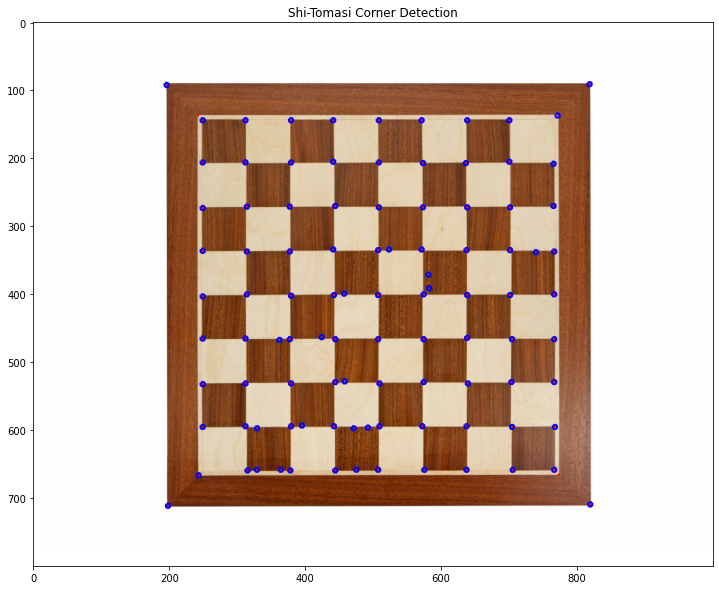

In [19]:
corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10)
corners = np.int0(corners)
for i in corners:
  x,y = i.ravel()
  cv.circle(input_img, (x,y),3,255,2)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(input_img,cv.COLOR_BGR2RGB)), plt.title('Shi-Tomasi Corner Detection')

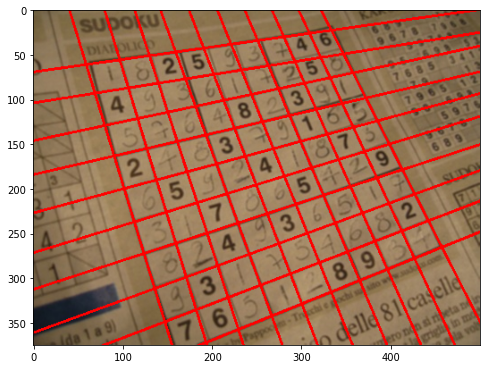

In [ ]:
sudoku = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/sudoku.jpg') 
img_gray = cv.cvtColor(sudoku, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)
kernel = np.ones((3,3), np.uint8) 
edges = cv.dilate(edges,kernel,iterations = 1)
kernel = np.ones((5,5), np.uint8) 
edges = cv.erode (edges, kernel, iterations = 1)
lines = cv.HoughLines(edges,1,np.pi/180,150)

if not lines.any():
    print('No lines were found') 
    exit()

if filter:
    rho_threshold = 15 
    theta_threshold = 0.1

    # how many lines are similar to the given
    similar_lines = {i : [] for i in range(len(lines))} 
    for i in range(len(lines)): 
      for j in range (len (lines)): 
        if i == j: 
            continue

        rho_i, theta_i = lines[i][0] 
        rho_j, theta_j = lines[j][0] 
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    # sort the line index by seeing how many are similar to it
    indices = [i for i in range(len(lines))] 
    indices.sort(key=lambda x: len(similar_lines[x]))

    # line flags as the basis for filtering
    line_flags = len(lines) *[True] 
    for i in range(len(lines) - 1): 
        if not line_flags [indices[i]]: # if the ith element is not included, it will be ignored
            continue

        for j in range(i + 1, len(lines)): 
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0] 
            rho_j, theta_j = lines[indices[j]][0] 
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    
    filtered_lines = []

    if filter:
        for i in range(len(lines)): # filtering
            if line_flags[i]:
                filtered_lines.append(lines[i])

    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0] 
        a = np.cos(theta) 
        b = np.sin(theta) 
        x0 = a*rho 
        y0 = b*rho 
        x1 = int(x0 + 1000*(-b)) 
        y1 = int(y0 + 1000*(a)) 
        x2 = int(x0 - 1000*(-b)) 
        y2 = int(y0 - 1000*(a))

        cv.line(sudoku, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(8,8)) 
    plt.imshow(cv.cvtColor(sudoku, cv.COLOR_BGR2RGB))

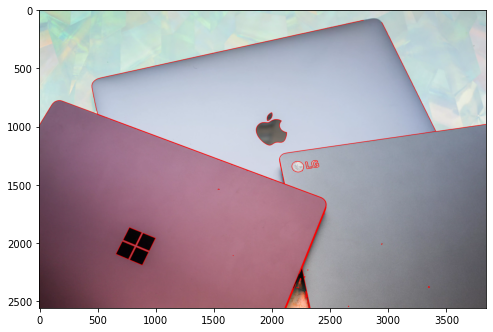

In [ ]:
laptop = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/laptop.jpg') 
laptop_gray = cv.cvtColor(laptop, cv.COLOR_BGR2GRAY)
edged = cv.Canny(laptop_gray, 30,200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(laptop,contours, -1, (0,0,255), 3)

plt.figure(figsize = (8,8))
plt.imshow(cv.cvtColor(laptop, cv.COLOR_BGR2RGB))